In [189]:
# function to read the files
def readfile(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()

    # Extract x and y values from the file, filtering out invalid lines
    x = []
    y = []
    for line in lines:
        values = line.split()
        if len(values) == 2:  
            try:
                x_val = float(values[0])
                y_val = float(values[1])
                x.append(x_val)
                y.append(y_val)
            except ValueError:
                continue
    # Convert lists to numpy arrays
    x = np.array(x)
    y = np.array(y)
            
    theta = np.arctan2(y, x)
    sorted_indices = np.argsort(theta)
    return np.array(x)[sorted_indices], np.array(y)[sorted_indices], np.array(theta)[sorted_indices]


def fitradius(r, theta, theta_fit):
    degree = 3
    coefficients = np.polyfit(theta, r, degree)

    return np.polyval(coefficients, theta_fit)

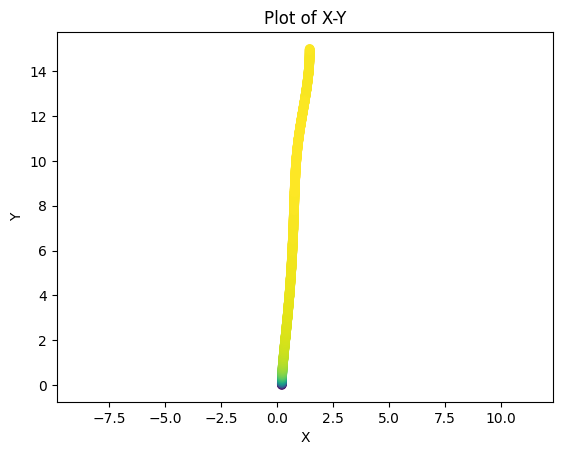

In [190]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve

x1, y1, theta1 = readfile('facet')

# Plot x-y values
plt.scatter(x1, y1, c=theta1, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.title('Plot of X-Y')
plt.xlim(0, 2.5)
plt.show()

double polynomial(double y) { return 0.207801*pow(y, 0) + 0.059600*pow(y, 1) + 0.011949*pow(y, 2) + 0.000295*pow(y, 3) + -0.000615*pow(y, 4) + 0.000067*pow(y, 5) + -0.000002*pow(y, 6) + -0.000000*pow(y, 7); }


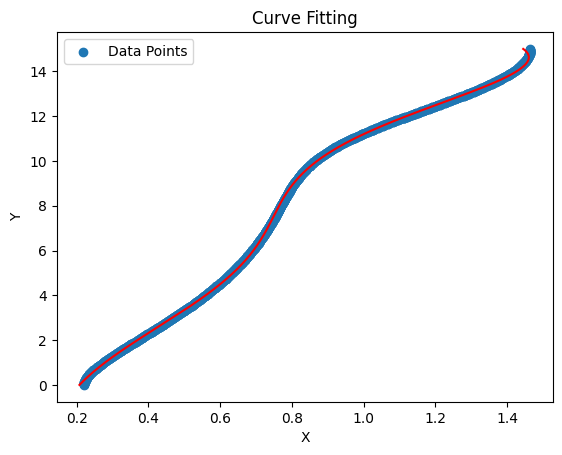

In [191]:
y_fit = np.linspace(0,15,1000)
degree = 7  # You can change the degree of the polynomial as needed
coefficients = np.polyfit(y1, x1, degree)
x_fit = np.polyval(coefficients,y_fit)
# Print the polynomial function in C syntax
poly_str = ' + '.join([f'{coeff:.6f}*pow(y, {i})' for i, coeff in enumerate(coefficients[::-1])])
print(f'double polynomial(double y) {{ return {poly_str}; }}')

# Plot the original data points
plt.scatter(x1, y1, label='Data Points')

# Plot the fitted curve
plt.plot(x_fit, y_fit, color='red')


# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Curve Fitting')

np.savetxt('f.txt', np.column_stack((x_fit, y_fit)), delimiter='\t')

plt.legend()
plt.show()

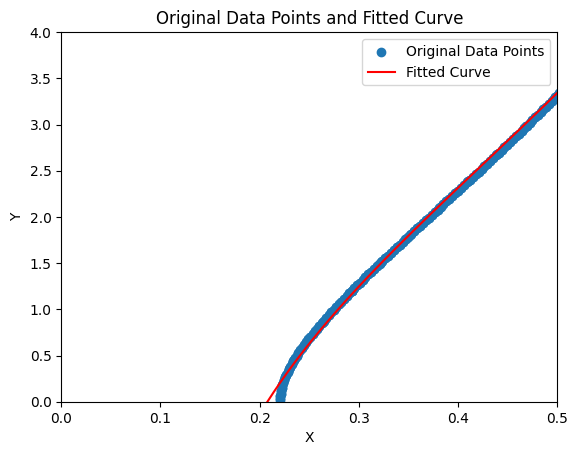

In [192]:
# Plot x1, y1
plt.scatter(x1, y1, label='Original Data Points')

# Read f.txt and plot x, y
data = np.loadtxt('f.txt', delimiter='\t')
x = data[:, 0]
y = data[:, 1]
plt.plot(x, y, color='red', label='Fitted Curve')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Original Data Points and Fitted Curve')
plt.legend()
plt.xlim(0,0.5)
plt.ylim(0,4)
plt.show()